In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tc = sns.load_dataset('titanic')
tc.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
tc.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
import warnings
warnings.filterwarnings('ignore')
tc['age'].fillna( value = tc['age'].mean(), inplace = True)
tc.dropna(inplace = True)

In [5]:
tc.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [6]:
X = tc[['sex', 'age', 'sibsp', 'parch', 'fare', 'pclass', 'embarked']]
y = tc['survived']

In [7]:
X.head()

,sex,age,sibsp,parch,fare,pclass,embarked
1,female,38.0,1,0,71.2833,1,C
3,female,35.0,1,0,53.1000,1,S
6,male,54.0,0,0,51.8625,1,S
10,female,4.0,1,1,16.7000,3,S
11,female,58.0,0,0,26.5500,1,S


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1 to 889
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       201 non-null    object 
 1   age       201 non-null    float64
 2   sibsp     201 non-null    int64  
 3   parch     201 non-null    int64  
 4   fare      201 non-null    float64
 5   pclass    201 non-null    int64  
 6   embarked  201 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 12.6+ KB


### Checking of the null values 

In [9]:
X.isnull().any()

sex         False
age         False
sibsp       False
parch       False
fare        False
pclass      False
embarked    False
dtype: bool

In [10]:
X.isnull().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
pclass      0
embarked    0
dtype: int64

### Visualising the data 

<Axes: xlabel='pclass', ylabel='count'>

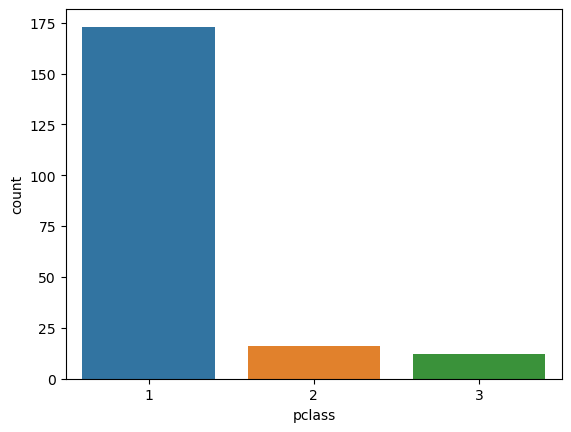

In [11]:
sns.countplot(x = 'pclass', data = X)

<Axes: xlabel='survived', ylabel='count'>

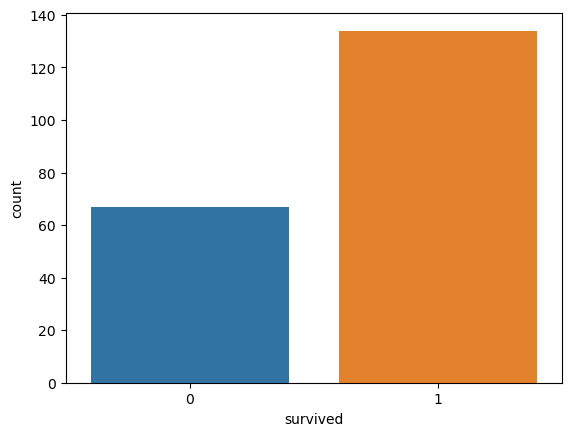

In [12]:
sns.countplot(x = 'survived', data = tc)

### Count the value of Embarked 

In [13]:
X['embarked'].value_counts()

embarked
S    128
C     69
Q      4
Name: count, dtype: int64

In [14]:
#Count the passenger class

X['pclass'].value_counts()

pclass
1    173
2     16
3     12
Name: count, dtype: int64

In [15]:
# Count the number of gender
X['sex'].value_counts()

sex
male      106
female     95
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

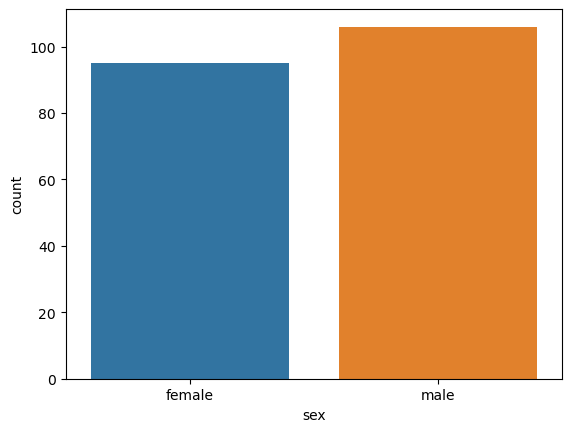

In [16]:
sns.countplot(x = 'sex', data = tc)

In [17]:
X['sibsp'].value_counts()

sibsp
0    123
1     69
2      6
3      3
Name: count, dtype: int64

<Axes: xlabel='sibsp', ylabel='count'>

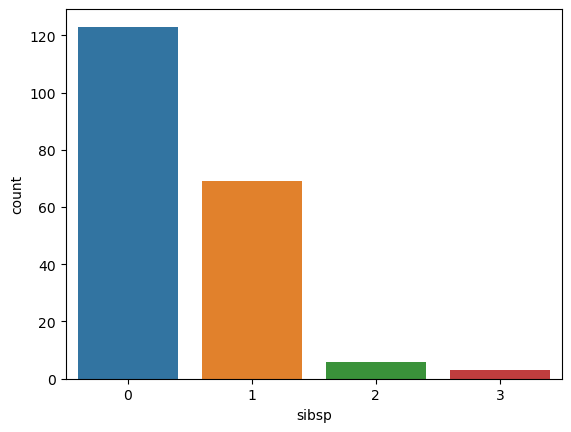

In [18]:
sns.countplot(x = 'sibsp', data = tc)

In [19]:
tc['survived'].value_counts()

survived
1    134
0     67
Name: count, dtype: int64

In [20]:
X.isnull().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
pclass      0
embarked    0
dtype: int64

In [21]:
import warnings
warnings.filterwarnings('ignore')


In [22]:
X.isnull().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
pclass      0
embarked    0
dtype: int64

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1 to 889
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       201 non-null    object 
 1   age       201 non-null    float64
 2   sibsp     201 non-null    int64  
 3   parch     201 non-null    int64  
 4   fare      201 non-null    float64
 5   pclass    201 non-null    int64  
 6   embarked  201 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 12.6+ KB


In [24]:
# The dropna drops the null values record from the dataset


In [25]:
X.isnull().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
pclass      0
embarked    0
dtype: int64

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1 to 889
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       201 non-null    object 
 1   age       201 non-null    float64
 2   sibsp     201 non-null    int64  
 3   parch     201 non-null    int64  
 4   fare      201 non-null    float64
 5   pclass    201 non-null    int64  
 6   embarked  201 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 12.6+ KB


In [27]:
#splitting of data into training and testing

from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)